In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

C:\Users\Artem\PycharmProjects\ML\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 795s 843ms/step - categorical_accuracy: 0.7133 - loss: 0.7928 - val_categorical_accuracy: 0.8533 - val_loss: 0.3977
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 739s 788ms/step - categorical_accuracy: 0.8583 - loss: 0.3955 - val_categorical_accuracy: 0.8950 - val_loss: 0.2839
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 698s 744ms/step - categorical_accuracy: 0.8764 - loss: 0.3387 - val_categorical_accuracy: 0.8987 - val_loss: 0.2844
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 656s 700ms/step - categorical_accuracy: 0.8888 - loss: 0.3066 - val_categorical_accuracy: 0.8957 - val_loss: 0.2787
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 658s 702ms/step - categorical_accuracy: 0.8947 - loss: 0.2872 - val_categorical_accuracy: 0.9098 - val_loss: 0.2495
313/313 - 26s - 82ms/step - categorical_accuracy: 0.9098 - loss: 0.2495
Точность (VGG16): 0.9097999930381775


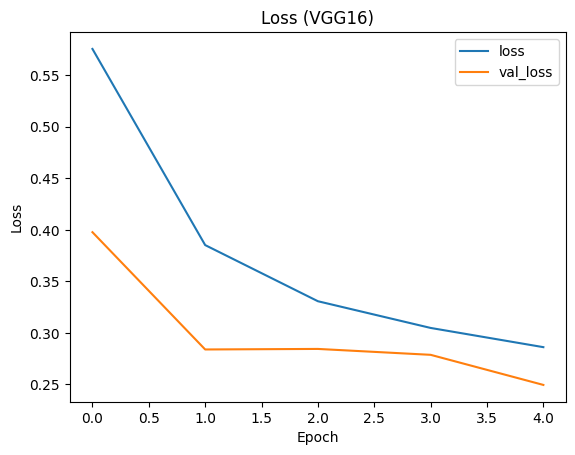

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

train_images_vgg = tf.image.resize(train_images[..., tf.newaxis], (32, 32))
train_images_vgg = tf.image.grayscale_to_rgb(train_images_vgg)
test_images_vgg = tf.image.resize(test_images[..., tf.newaxis], (32, 32))
test_images_vgg = tf.image.grayscale_to_rgb(test_images_vgg)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

vgg16_model = tf.keras.Sequential([
    VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10, activation="softmax")
])

vgg16_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

vgg16_history = vgg16_model.fit(
    datagen.flow(train_images_vgg, train_labels, batch_size=64),
    epochs=5,
    validation_data=(test_images_vgg, test_labels)
)

test_loss, test_acc = vgg16_model.evaluate(test_images_vgg, test_labels, verbose=2)
print(f"Точность (VGG16): {test_acc}")
3
plt.plot(vgg16_history.history['loss'], label='loss')
plt.plot(vgg16_history.history['val_loss'], label='val_loss')
plt.title('Loss (VGG16)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [35]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [4]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
# Після навчання можна порівняти точність цієї моделі з багатошаровою нейронною мережею, 
# створеною на попередньому етапі. Очікується,
# що використання VGG16, як глибшої мережі, дасть вищу точність завдяки її здатності витягувати складніші ознаки.
# А ще чекати годину заради 5 епох це прям сок.